# Data Processing/Cleanup

In [ ]:
import pandas as pd
import csv
%matplotlib inline
from datetime import datetime
import numpy as np
from time import strptime
import math


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


from sklearn import linear_model # for training a linear model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot # for plotting in general
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

import pandas as pd

In [ ]:
original_data = pd.read_csv('/Users/humrabb/Downloads/G&T Results 2017-18 (Responses) - Form Responses 1.csv')
pd.set_option('display.max_rows', original_data.shape[0]+1)

The dataset I used for data cleanup was a dataset on test scores on New York City's Gifted and Talented Test. This data was collected through a survey, which had 116 responses. The survey also gave information about school preferences, assigned schools, and whether or not each person wanted to enroll their child in the reccomended/assigned school. 

In [ ]:
original_data

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,4/8/2017 6:44:01,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,4/7/2017 10:40:45,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,4/7/2017 10:41:56,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,4/7/2017 10:43:31,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,4/10/2017 10:18:34,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,4/7/2017 11:03:21,K,NaN,May,24,97,36,98,98,NaN,NaN,NaN
6,4/7/2017 11:15:28,K,NaN,February,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,4/7/2017 11:26:16,K,NaN,October,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,4/7/2017 11:31:41,1,NaN,March,23,81,42,99,95,NaN,NaN,NaN
9,4/7/2017 11:32:52,2,NaN,April,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes



1. Convert timestamps into better form
2. Convert Kindergarten into numerical value
3. Deal with null values in district column
4. Convert month into numerical values? 
5. For all test scores, fix cases where the score is written as a fraction
6. Fix school preferences column (convert schools to numerical values, find way to predict null values?)
7. Same problem as #7 for assigned school column
8. For will you enroll there, convert to numerical values and fix null values

# Part 1: Converting Timestamps

In [ ]:
original_data

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,4/8/2017 6:44:01,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,4/7/2017 10:40:45,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,4/7/2017 10:41:56,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,4/7/2017 10:43:31,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,4/10/2017 10:18:34,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,4/7/2017 11:03:21,K,NaN,May,24,97,36,98,98,NaN,NaN,NaN
6,4/7/2017 11:15:28,K,NaN,February,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,4/7/2017 11:26:16,K,NaN,October,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,4/7/2017 11:31:41,1,NaN,March,23,81,42,99,95,NaN,NaN,NaN
9,4/7/2017 11:32:52,2,NaN,April,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


The first thing I needed to fix was converting the 'Timestamp' column into a better form for analysis. The reason it wasn't in a great form originally is because it included the date as well as hours, minutes, and seconds - this would have made it hard to graph and separate values into categories such as by month. I decided to convert all the values in the timestamp column into the form month/year, as that seemed like the best choice considering that the data was mostly over the course of just a few months in 2017. 

The first part of this was dropping the hours:minutes:seconds part of the values, since they were no longer relevant. I realized that in each timestamp value, there was a convenient space in between the actual date and the hours:minutes:seconds. I used python's "find" function to find the character of the space in each value, and truncated the string, removing all the characters to the right of the space (the hours:minutes:sections portion).

In [ ]:
myString = '4/8/2017 6:44:01'
myString.find(' ')

8

The below for loop shows my thought process for finding the character of the space in the timestamp values and truncating each string. For each value, I found the position of the space and shortened the string by reassigning the value of each string to just the characters to the left of the space.

In [ ]:
for row in original_data.itertuples(index = False):
    myString = (row[0])
    findChar = (myString.find(' '))
    string = myString[:findChar]
    print (string)

4/8/2017
4/7/2017
4/7/2017
4/7/2017
4/10/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/9/2017
4/10/2017
4/10/2017
4/10/2017
4/10/2017
4/10/2017
4/11/2017
4/11/2017
4/12/2017
4/12/2017
4/13/2017
4/13/2017
4/13/2017
4/13/2017
4/13/2017
4/16/2017
4/17/2017
4/17/2017
4/17/2017
4/17/2017
4/18/2017
4/19/2017
4/20/2017
4/20/2017
4/21/2017
4/21/2017
4/24/2017
4/24/2017
4/24/2017
4/24/2017
4/24/2017
4/25/2017
4/25/2017
4/25/2017
4/25/2017
4/25/2017
4/25/2017
4/25/2017
4/26/2017
4/26/2017
4/26/2017
4/26/2017
4/26/2017
4/27/2017
4/28/2017
4/28/2017
4/29/2017
5/3/2017
5/3/2017
5/3/2017
5/4/2017
5/5/2017
5/5/2017
5/7/2017
5/8/2017
5/9/2017
5/10/2017
5/15/2017
5/16/2017
5/24/2017
5/24/2017
5/29/2017
5/31/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/2/2017
6

Next, I shortened the above code into a one-line for loop:

In [ ]:
for row in original_data['Timestamp']:
    print (row[:row.find(' ')])

4/8/2017
4/7/2017
4/7/2017
4/7/2017
4/10/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/7/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/8/2017
4/9/2017
4/10/2017
4/10/2017
4/10/2017
4/10/2017
4/10/2017
4/11/2017
4/11/2017
4/12/2017
4/12/2017
4/13/2017
4/13/2017
4/13/2017
4/13/2017
4/13/2017
4/16/2017
4/17/2017
4/17/2017
4/17/2017
4/17/2017
4/18/2017
4/19/2017
4/20/2017
4/20/2017
4/21/2017
4/21/2017
4/24/2017
4/24/2017
4/24/2017
4/24/2017
4/24/2017
4/25/2017
4/25/2017
4/25/2017
4/25/2017
4/25/2017
4/25/2017
4/25/2017
4/26/2017
4/26/2017
4/26/2017
4/26/2017
4/26/2017
4/27/2017
4/28/2017
4/28/2017
4/29/2017
5/3/2017
5/3/2017
5/3/2017
5/4/2017
5/5/2017
5/5/2017
5/7/2017
5/8/2017
5/9/2017
5/10/2017
5/15/2017
5/16/2017
5/24/2017
5/24/2017
5/29/2017
5/31/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/1/2017
6/2/2017
6

And finally, I created a function called "convert_time" that executed the code in the above for loop in the form of a function.

In [ ]:
def convert_time(row):
    return (row[:row.find(' ')])

Using the .apply() function, I was able to create a new column called "converted_time" with the updated values, and update the timestamp column in the original dataframe to now be the same as "converted_time":

In [ ]:
converted_time = original_data['Timestamp'].apply(convert_time)

In [ ]:
converted_time_df = original_data.copy()

In [ ]:
converted_time_df['Timestamp'] = converted_time

In [ ]:
converted_time_df

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,4/8/2017,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,4/7/2017,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,4/7/2017,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,4/7/2017,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,4/10/2017,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,4/7/2017,K,NaN,May,24,97,36,98,98,NaN,NaN,NaN
6,4/7/2017,K,NaN,February,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,4/7/2017,K,NaN,October,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,4/7/2017,1,NaN,March,23,81,42,99,95,NaN,NaN,NaN
9,4/7/2017,2,NaN,April,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


The next step was to get the values into a month/year format. To do this, I imported the "datetime" package and converted all the string values into type datetime, formatting them as just the month and the year:

In [ ]:
updated_time = pd.to_datetime(converted_time_df['Timestamp']).dt.to_period('m')
print (updated_time)

0      2017-04
1      2017-04
2      2017-04
3      2017-04
4      2017-04
5      2017-04
6      2017-04
7      2017-04
8      2017-04
9      2017-04
10     2017-04
11     2017-04
12     2017-04
13     2017-04
14     2017-04
15     2017-04
16     2017-04
17     2017-04
18     2017-04
19     2017-04
20     2017-04
21     2017-04
22     2017-04
23     2017-04
24     2017-04
25     2017-04
26     2017-04
27     2017-04
28     2017-04
29     2017-04
30     2017-04
31     2017-04
32     2017-04
33     2017-04
34     2017-04
35     2017-04
36     2017-04
37     2017-04
38     2017-04
39     2017-04
40     2017-04
41     2017-04
42     2017-04
43     2017-04
44     2017-04
45     2017-04
46     2017-04
47     2017-04
48     2017-04
49     2017-04
50     2017-04
51     2017-04
52     2017-04
53     2017-04
54     2017-04
55     2017-04
56     2017-04
57     2017-04
58     2017-04
59     2017-04
60     2017-04
61     2017-04
62     2017-04
63     2017-04
64     2017-04
65     2017-04
66     201

In [ ]:
final_time_df = converted_time_df.copy()
final_time_df['Timestamp'] = updated_time

In [ ]:
final_time_df

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,2017-04,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,K,NaN,May,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,K,NaN,February,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,K,NaN,October,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,NaN,March,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,NaN,April,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


The values ended up in python's datetime format as year-month. 

### Implications of this change

There are a couple of implications of my choice to convert the values into this format:
1. I believe the data became easier to analyze because all the dates were now in the datetime format, which makes it easier (when you're using python) to sort, search, and manipulate the dates. If the data were still in string format, it would be much harder to organize and manipulate as you would end up having to search each string individually for the correct month/day/year values.

2. In another sense, information and specificity of the data was lost in this process, as I removed both the hours:minutes:seconds and the day portions of the timestamps. My justification for this choice is that this data is survey data about test scores - so the specific days and times don't really matter that much. As long as you are able to infer the general time the test was taken for each of these students from the date, the other information doesn't really matter - which is why I chose to truncate the data to just including the year and the month.

# Part 2: Converting grade levels into numerical values

In [ ]:
final_time_df

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,2017-04,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,K,NaN,May,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,K,NaN,February,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,K,NaN,October,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,NaN,March,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,NaN,April,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


In [ ]:
final_time_df['Entering Grade Level'].value_counts()

K    77
1    28
2    10
3     2
Name: Entering Grade Level, dtype: int64

The second part of the dataset that needed fixing was the grade level column, which used a "K" to represent kindergarten, but 1's, 2's, and 3's to represent first, second, and third grade. I thought it was important to convert the K's into a numerical value so the datatypes of the column would be consistent. This would make it much easier to analyze and explore.

To do this, I used the .replace function to replace all the 'K''s with 0's.

In [ ]:
final_grade_df = final_time_df.copy()
final_grade_df = final_grade_df.replace({'K':0})
final_grade_df

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,NaN,May,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,NaN,February,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,NaN,October,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,NaN,March,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,NaN,April,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


### Implications of this change
1. I believe the only implication of my choice to convert all the 'K''s to 0's was making it much easier to analyze the grade level column. Making all the values in the column numerical makes it easier to do things such as take the average, mode, and other functions of the column. It also makes the data have a consistent data type, rather than having strings and ints mixed in the same column.

# Part 3: Dealing with null values in 'District' column

I noticed that there were a fair amount of null values in the 'District' column. Since the dataset was already relatively small and I didn't want to further compromise the accuracy of future machine learning models, I decided against dropping the rows with null values. To help me decide how to best change the null values, I decided to take a look at the frequency and variety of the values in the column:

In [ ]:
final_grade_df['District'].value_counts()

2.0     35
3.0     14
28.0     9
26.0     8
20.0     6
25.0     3
30.0     3
22.0     3
21.0     3
32.0     3
17.0     2
14.0     2
11.0     2
15.0     2
1.0      2
4.0      1
31.0     1
24.0     1
6.0      1
Name: District, dtype: int64

In [ ]:
final_grade_df[final_grade_df['District'].isnull()]

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
1,2017-04,0,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,NaN,September,23,97,40,99,98,NaN,NaN,NaN
5,2017-04,0,NaN,May,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,NaN,February,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,NaN,October,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,NaN,March,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,NaN,April,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes
10,2017-04,0,NaN,June,17,77,39,99,94,NaN,NaN,Maybe
11,2017-04,0,NaN,December,23,98,45,99,99,NaN,NaN,NaN


Becuase it wouldn't have made sense to replace the null values with the mean or median of the rest of the column (you can't have a fractional district), I decided to just replace each of the null values with a random draw from the rest of the column. I chose to do this because it would most closely mimic the distribution of the rest of the column, keeping the data mostly the same. To do this, I first created a new dataframe with the district column, used code I found online to randomly select values from the dataframe, and updated the original dataframe with the new values.

In [ ]:
district = final_grade_df[['District']]
district

,District
0,6.0
1,NaN
2,NaN
3,NaN
4,22.0
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [ ]:
M = len(district.index)
N = len(district.columns)

val = np.ravel(district.values)
val = val[~np.isnan(val)]
val = np.random.choice(val, size=(M,N))
ran = pd.DataFrame(val, columns=district.columns, index=district.index)

district.update(ran)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [ ]:
final_district = final_grade_df.copy()
final_district['District'] = district
final_district

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,March,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,September,23,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,May,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,February,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,October,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,March,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,April,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


### Implications of this change
1. This change was extremely beneficial, as it allowed me to increase the completeness of the data by making somewhat educated guesses about the null values. Overall, this change made it easier to analyze the data as a whole.

# Part 4: Converting Months into Integers



In [ ]:
final_district['Birth Month'].value_counts()

January      18
March        14
May          13
April        12
December     11
July         11
February     11
October       7
November      7
August        6
September     4
June          3
Name: Birth Month, dtype: int64

In [ ]:
for row in final_district["Birth Month"]:
    print (strptime(row, '%B').tm_mon)

9
8
3
9
4
5
2
10
3
4
6
12
7
5
1
1
1
6
12
8
5
7
2
11
1
1
3
11
1
2
5
3
5
5
8
8
7
12
11
7
4
3
1
10
2
12
1
3
12
9
3
2
12
3
1
4
7
2
7
10
5
3
1
3
4
5
7
1
9
1
1
5
10
11
3
11
3
12
12
2
1
5
3
10
8
5
7
11
12
2
2
10
2
6
5
4
1
10
7
5
4
12
4
1
3
7
4
4
11
4
1
12
8
7
2
4
1


In [ ]:
def convert_birth(row):
    return (strptime(row, '%B').tm_mon)
    

In [ ]:
final_birth = final_district.copy()
final_birth['Birth Month'] = final_birth['Birth Month'].apply(convert_birth)
final_birth

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


In [ ]:
final_birth

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


### Implications of this change
1. This change allows the data to be manipulated in more ways - since the months have been converted into integer values, it is now possible to take the median, mode, and other measures of the birth month. It is also possible to select specific ranges of months. Overall, this change was beneficial as it allowed for greater flexibility, which will help when it comes to machine learning models.

# Part 5: Clean up Test Scores columns
The test scores columns had a few problems. First, the scores were sometimes written as fractions, when they should have been written as just the score itself. Second, the "raw" score columns didn't have much meaning, as they were simply numbers such as 23,25,and 27 - in order to make this column more effective, I needed to convert these values into decimals or percentages so they would more accurately represent the amount of questions each student answered correctly. 

First, I had to update the values of the "OLSAT Verbal Score" and "NNAT Non Verbal Raw Score" columns to not have fractions in some of the cells. 

In [ ]:
condition = final_birth["OLSAT Verbal Score"].str.contains('/')
condition

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33      True
34     False
35     False
36     False
37      True
38     False
39     False
40     False
41      True
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [ ]:
def convert_scores(row):
    myString = (row)
    findChar = (myString.find('/'))
    if findChar > 0:
        string = myString[:findChar]
        return (string)
    else:
        string = myString
        return(string)

In [ ]:
converted_scores = final_birth.copy()
converted_scores['OLSAT Verbal Score'] = converted_scores['OLSAT Verbal Score'].apply(convert_scores)

In [ ]:
converted_scores

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


The next step for this column was to fix the non-numerical and missing values. To do this, I simply took the average of the column and used that for the missing values. First, row 84 had a string value of "Fill out later." The only other score in row 84 was in the OLSAT Verbal Percentile column, in which this student got in about the 70th percentile. Looking up a few rows, row 79 has complete scores of a student who scored in around the 70th percentile - I decided to use the same OLSAT Verbal Score value for this student (21).

In [ ]:
converted_scores.at[84, 'OLSAT Verbal Score'] = 21

In [ ]:
converted_scores

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


Next, in row 68, the value was 99 - to fix this is I looked at the next column (percentile). The value in that column was 99, so by looking at the other rows with percentile values of 99, I was able to determine that almost all students who got in the 99th percentile for verbal also got a raw score of 29.

In [ ]:
converted_scores.at[68, "OLSAT Verbal Score"] = 29

In [ ]:
converted_scores

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


By following the same logic used above, I was able to fix the rest of the values over 30:

In [ ]:
converted_scores.at[111, "OLSAT Verbal Score"] = 29
converted_scores.at[113, "OLSAT Verbal Score"] = 24


In [ ]:
converted_scores

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29,99,44,99,99,Any citywide or district 3 school,NaN,Yes


Finally, there were two remaining values that were missing in rows 104 and 108. Now that I had changed all the values to be under 30, I decided to use the average of the column for the two missing values. The reason I chose not to use the average for the previous values I had to change is because the values over 30 would skew the average. 

Since not all the values were in int, I also had to convert them.

In [ ]:
def convert_type(row):
    try:
        return int(row) 
    except:
        return

In [ ]:
converted_values = converted_scores['OLSAT Verbal Score'].apply(convert_type)

In [ ]:
converted_values

0      28.0
1      25.0
2      27.0
3      23.0
4      25.0
5      24.0
6      26.0
7      24.0
8      23.0
9      29.0
10     17.0
11     23.0
12     24.0
13     29.0
14     28.0
15     26.0
16     26.0
17     25.0
18     21.0
19     25.0
20     28.0
21     28.0
22     28.0
23     28.0
24     26.0
25     28.0
26     28.0
27     28.0
28     26.0
29     27.0
30     27.0
31     32.0
32     19.0
33     24.0
34     13.0
35     29.0
36     18.0
37     23.0
38     18.0
39     22.0
40     23.0
41     17.0
42     24.0
43     26.0
44     26.0
45     27.0
46     28.0
47     24.0
48     29.0
49     28.0
50     29.0
51     20.0
52     28.0
53     25.0
54     24.0
55     24.0
56     24.0
57     23.0
58     27.0
59     22.0
60     25.0
61     26.0
62     26.0
63     28.0
64     23.0
65     29.0
66     29.0
67     24.0
68     29.0
69     25.0
70     19.0
71     29.0
72     90.0
73     20.0
74     21.0
75     28.0
76     30.0
77     23.0
78     23.0
79     21.0
80     24.0
81     35.0
82     22.0
83  

In [ ]:
converted_scores['OLSAT Verbal Score'] = converted_values

In [ ]:
converted_scores['OLSAT Verbal Score'].mean()

26.31304347826087

In [ ]:
def finish_converting(row):
    if np.isnan(row) == True:
        return converted_scores['OLSAT Verbal Score'].mean()
    else:
        return row

In [ ]:
final_conversion = converted_scores['OLSAT Verbal Score'].apply(finish_converting)

In [ ]:
final_conversion

0      28.000000
1      25.000000
2      27.000000
3      23.000000
4      25.000000
5      24.000000
6      26.000000
7      24.000000
8      23.000000
9      29.000000
10     17.000000
11     23.000000
12     24.000000
13     29.000000
14     28.000000
15     26.000000
16     26.000000
17     25.000000
18     21.000000
19     25.000000
20     28.000000
21     28.000000
22     28.000000
23     28.000000
24     26.000000
25     28.000000
26     28.000000
27     28.000000
28     26.000000
29     27.000000
30     27.000000
31     32.000000
32     19.000000
33     24.000000
34     13.000000
35     29.000000
36     18.000000
37     23.000000
38     18.000000
39     22.000000
40     23.000000
41     17.000000
42     24.000000
43     26.000000
44     26.000000
45     27.000000
46     28.000000
47     24.000000
48     29.000000
49     28.000000
50     29.000000
51     20.000000
52     28.000000
53     25.000000
54     24.000000
55     24.000000
56     24.000000
57     23.000000
58     27.0000

In [ ]:
final_verbal = converted_scores.copy()

In [ ]:
final_verbal['OLSAT Verbal Score'] = final_conversion

In [ ]:
final_verbal

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28.000000,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25.000000,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27.000000,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23.000000,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25.000000,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24.000000,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26.000000,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24.000000,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23.000000,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29.000000,99,44,99,99,Any citywide or district 3 school,NaN,Yes


Next was the OLSAT Verbal Percentile column. The only problem with this column was row 84, which had a "~" before the value. To fix this, I simply changed the value to 70.

In [ ]:
final_verbal.at[84, "OLSAT Verbal Percentile"] = 70

I also had to convert the values in this column to ints using my previous function, convert_type.

In [ ]:
converted_percentile = final_verbal['OLSAT Verbal Percentile'].apply(convert_type)

In [ ]:
final_percentile = final_verbal.copy()

In [ ]:
final_percentile['OLSAT Verbal Percentile'] = converted_percentile
final_percentile

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28.000000,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25.000000,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27.000000,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23.000000,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25.000000,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24.000000,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26.000000,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24.000000,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23.000000,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29.000000,99,44,99,99,Any citywide or district 3 school,NaN,Yes


Next was the "NNAT Non Verbal Raw Score" column. This column had the exact same problems as the OLSAT Verbal Score column, which were that some of the scores were written as fractions, some were above 48 (the max), there was a string, and there were two null values. I followed the exact same approach to fix this column as the OLSAT verbal score column.

In [ ]:
converted_nonverbal = final_percentile.copy()

In [ ]:
converted_nonverbal['NNAT Non Verbal Raw Score'] = converted_nonverbal['NNAT Non Verbal Raw Score'].apply(convert_scores)

In [ ]:
converted_nonverbal

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28.000000,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25.000000,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27.000000,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23.000000,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25.000000,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24.000000,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26.000000,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24.000000,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23.000000,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29.000000,99,44,99,99,Any citywide or district 3 school,NaN,Yes


Make educated guesses about values > 48:
People who got in the 99th percentile for the non verbal percentile category and the overall score (like the student in row 68) got anywhere between 39 and 47 for the raw score. I decided to just take the average, which was 43. I did this because I thought it would keep the data relatively consistent and that it was a pretty "safe bet" for the value.

In [ ]:
converted_nonverbal.at[68, "NNAT Non Verbal Raw Score"] = 43

In [ ]:
converted_nonverbal

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28.000000,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25.000000,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27.000000,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23.000000,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25.000000,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24.000000,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26.000000,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24.000000,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23.000000,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29.000000,99,44,99,99,Any citywide or district 3 school,NaN,Yes


For row 72, the other students that scored in the 90th percentile for verbal and 99th percentile for non verbal all got 39, so I used that value.

In [ ]:
converted_nonverbal.at[72, "NNAT Non Verbal Raw Score"] = 39

In [ ]:
converted_nonverbal

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28.000000,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25.000000,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27.000000,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23.000000,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25.000000,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24.000000,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26.000000,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24.000000,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23.000000,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29.000000,99,44,99,99,Any citywide or district 3 school,NaN,Yes


I decided to eliminate row 84, as it had null values in all of the last three columns.

In [ ]:
newnonverbal = converted_nonverbal.drop([84])

In [ ]:
newnonverbal

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28.000000,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25.000000,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27.000000,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23.000000,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25.000000,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24.000000,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26.000000,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24.000000,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23.000000,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29.000000,99,44,99,99,Any citywide or district 3 school,NaN,Yes


In [ ]:
newnonverbal.at[98, "NNAT Non Verbal Raw Score"] = 43
newnonverbal.at[111, "NNAT Non Verbal Raw Score"] = 43
newnonverbal.at[113, "NNAT Non Verbal Raw Score"] = 43

In [ ]:
newnonverbal

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28.000000,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25.000000,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27.000000,96,42,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23.000000,97,40,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25.000000,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24.000000,97,36,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26.000000,99,42,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24.000000,99,42,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23.000000,81,42,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29.000000,99,44,99,99,Any citywide or district 3 school,NaN,Yes


Finally, I simply replaced the remaining missing values with the average. I first used my previous convert_type function, and then used my previous finish_converting function.

In [ ]:
raw_converted = newnonverbal['NNAT Non Verbal Raw Score'].apply(convert_type)

In [ ]:
raw_converted

0      45.0
1      39.0
2      42.0
3      40.0
4      38.0
5      36.0
6      42.0
7      42.0
8      42.0
9      44.0
10     39.0
11     45.0
12     39.0
13     48.0
14     43.0
15     40.0
16     46.0
17     41.0
18     43.0
19     39.0
20     46.0
21     38.0
22     44.0
23     41.0
24     42.0
25     43.0
26     45.0
27     47.0
28     46.0
29     46.0
30     45.0
31     40.0
32     40.0
33     36.0
34     27.0
35     37.0
36     38.0
37     40.0
38     45.0
39     41.0
40     39.0
41     36.0
42     42.0
43     35.0
44     40.0
45     43.0
46     46.0
47     44.0
48     45.0
49     42.0
50     44.0
51     33.0
52     44.0
53     40.0
54     45.0
55     40.0
56     34.0
57     37.0
58     38.0
59     34.0
60     36.0
61     45.0
62     39.0
63     43.0
64     45.0
65     48.0
66     40.0
67     40.0
68     43.0
69     41.0
70     38.0
71     44.0
72     39.0
73     39.0
74     39.0
75     47.0
76     39.0
77     37.0
78     37.0
79     42.0
80     39.0
81     40.0
82     40.0
83  

In [ ]:
newnonverbal['NNAT Non Verbal Raw Score'] = raw_converted

In [ ]:
finalnonverbal = newnonverbal.copy()

In [ ]:
finalnonverbal['NNAT Non Verbal Raw Score'] = finalnonverbal['NNAT Non Verbal Raw Score'].apply(finish_converting)

In [ ]:
finalnonverbal

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04,1,28.0,9,28.000000,99,45.000000,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04,0,28.0,8,25.000000,99,39.000000,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04,1,3.0,3,27.000000,96,42.000000,99,98,NaN,NaN,Maybe
3,2017-04,0,15.0,9,23.000000,97,40.000000,99,98,NaN,NaN,NaN
4,2017-04,0,31.0,4,25.000000,98,38.000000,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04,0,2.0,5,24.000000,97,36.000000,98,98,NaN,NaN,NaN
6,2017-04,0,28.0,2,26.000000,99,42.000000,99,99,Anderson NEST TAG Q300,NaN,NaN
7,2017-04,0,3.0,10,24.000000,99,42.000000,99,99,"Nest+M, Anderson",NaN,Yes
8,2017-04,1,26.0,3,23.000000,81,42.000000,99,95,NaN,NaN,NaN
9,2017-04,2,15.0,4,29.000000,99,44.000000,99,99,Any citywide or district 3 school,NaN,Yes


## Implications of this change

Overall, cleaning up the score columns simply makes the data more complete and easier to analyze. However, there are a few possible sources of error in my process:
1. My "best guesses" for null or missing values may not have always been the best idea. The reason I didn't just use the average or median in all these cases is because there were cells with strings/fractional values as well as cells with values over the maximum score. This made it hard to extract an average from these columns to use.
2. This could have been fixed by changing the order of things I fixed - for example, fixing the values over 30 in the OLSAT Verbal Score column first could have been a better idea, since I would have been able to get an average value for the column to use for the missing values.

# Part 6: Last three columns
Looking at the last three columns, I realized that there were more null values than actual data. Additionally, the school preferences column had multiple schools listed for many of the rows, which would have made it hard to clean up the data, even if I assigned each school a unique numerical value as I had originally planned. Ultimately, because of these reasons I decided to drop all three of these columns altogether.

In [ ]:
cleandata = finalnonverbal.drop(['School Preferences', 'School Assigned', 'Will you enroll there?'], axis=1)

In [ ]:
cleandata

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score
0,2017-04,1,28.0,9,28.000000,99,45.000000,99,99
1,2017-04,0,28.0,8,25.000000,99,39.000000,99,99
2,2017-04,1,3.0,3,27.000000,96,42.000000,99,98
3,2017-04,0,15.0,9,23.000000,97,40.000000,99,98
4,2017-04,0,31.0,4,25.000000,98,38.000000,99,99
5,2017-04,0,2.0,5,24.000000,97,36.000000,98,98
6,2017-04,0,28.0,2,26.000000,99,42.000000,99,99
7,2017-04,0,3.0,10,24.000000,99,42.000000,99,99
8,2017-04,1,26.0,3,23.000000,81,42.000000,99,95
9,2017-04,2,15.0,4,29.000000,99,44.000000,99,99


# Part 7: Final Cleanup

To make sure that the data was really ready for analysis, I decided to do a final "sweep" of the data. First, I decided to check to make sure each column had a consistent datatype:

In [ ]:
cleandata.dtypes

Timestamp                     period[M]
Entering Grade Level             object
District                        float64
Birth Month                       int64
OLSAT Verbal Score              float64
OLSAT Verbal Percentile           int64
NNAT Non Verbal Raw Score       float64
NNAT Non Verbal Percentile        int64
Overall Score                     int64
dtype: object

The Entering Grade Level column had multiple different types, so I decided to convert the entire column into ints, since that was the end goal of converting all the K's into 0's. I simply used my previous function:

In [ ]:
final_type = cleandata['Entering Grade Level'].apply(convert_type)

In [ ]:
final_data = cleandata.copy()

In [ ]:
final_data['Entering Grade Level'] = final_type

In [ ]:
final_data

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score
0,2017-04,1,28.0,9,28.000000,99,45.000000,99,99
1,2017-04,0,28.0,8,25.000000,99,39.000000,99,99
2,2017-04,1,3.0,3,27.000000,96,42.000000,99,98
3,2017-04,0,15.0,9,23.000000,97,40.000000,99,98
4,2017-04,0,31.0,4,25.000000,98,38.000000,99,99
5,2017-04,0,2.0,5,24.000000,97,36.000000,98,98
6,2017-04,0,28.0,2,26.000000,99,42.000000,99,99
7,2017-04,0,3.0,10,24.000000,99,42.000000,99,99
8,2017-04,1,26.0,3,23.000000,81,42.000000,99,95
9,2017-04,2,15.0,4,29.000000,99,44.000000,99,99


Finally, I realized that some of the columns shouldn't be in the float64 type - namely the district and the raw scores columns. It didn't make sense for the districts to be floats since they are always whole numbers, and you can't have fractional raw scores.

In [ ]:
final_data['District'] = final_data['District'].apply(convert_type)

In [ ]:
final_data['OLSAT Verbal Score'] = final_data['OLSAT Verbal Score'].apply(convert_type)

In [ ]:
final_data['NNAT Non Verbal Raw Score'] = final_data['NNAT Non Verbal Raw Score'].apply(convert_type)

In [ ]:
final_data.dtypes

Timestamp                     period[M]
Entering Grade Level              int64
District                          int64
Birth Month                       int64
OLSAT Verbal Score                int64
OLSAT Verbal Percentile           int64
NNAT Non Verbal Raw Score         int64
NNAT Non Verbal Percentile        int64
Overall Score                     int64
dtype: object

In [ ]:
final_data

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score
0,2017-04,1,28,9,28,99,45,99,99
1,2017-04,0,28,8,25,99,39,99,99
2,2017-04,1,3,3,27,96,42,99,98
3,2017-04,0,15,9,23,97,40,99,98
4,2017-04,0,31,4,25,98,38,99,99
5,2017-04,0,2,5,24,97,36,98,98
6,2017-04,0,28,2,26,99,42,99,99
7,2017-04,0,3,10,24,99,42,99,99
8,2017-04,1,26,3,23,81,42,99,95
9,2017-04,2,15,4,29,99,44,99,99


The data is now ready for analysis!

# Conclusions

In the end, I ended up changing the following parts of the dataset:
1. I converted the timestamps into a more convenient format
2. Converted grade levels into numerical values
3. Dealt with null values in the District column
4. Converted the Birth Month column to numerical values
5. Cleaned up all the percentile and raw scores columns (dealing with null values, converting to int, etc)
6. Dropped the last three columns (too many null values)
7. Converted entire dataframe into having more consistent datatypes

## Final Exploration 
For my final exploration, I decided to do some deeper analysis of this dataset. I wanted to explore how different learning models and techniques would represent this data.

# 1. Linear Regression

I wanted to explore the relationship between raw score and percentile. I expected there to be a perfectly linear relationship, since percentile is just another representation of the raw score compared to others. I wanted to see how well a linear model could predict the percentile from the raw score.

In [ ]:
regression = cluster.copy()

Text(0, 0.5, 'Percentile')

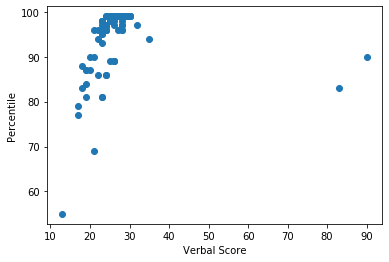

In [ ]:
x = regression['OLSAT Verbal Score']
y = regression['OLSAT Verbal Percentile']

# plt.axis([10,50,80,110])
plt.scatter(x,y)
plt.xlabel("Verbal Score")
plt.ylabel("Percentile")

It looks like there were two people who put their verbal scores in as the percentile. I dropped these two rows (code not shown because it caused an error if I tried to run it multiple times, but I did regression.drop([72,83])


Text(0, 0.5, 'Percentile')

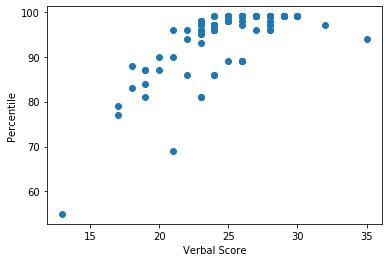

In [ ]:
x = regression['OLSAT Verbal Score']
y = regression['OLSAT Verbal Percentile']

# plt.axis([10,50,80,110])
plt.scatter(x,y)
plt.xlabel("Verbal Score")
plt.ylabel("Percentile")

This allows us to more clearly see the relationship between verbal score and percentile. One interesting thing to note is that in some cases, a high raw score did not correspond with a high percentile - this could have been due to the percentile being calculated by district, meaning that in some places, a raw score of 29 would be in the 99th percentile, while in other places, a raw score of 35 could be in the 95th percentile.

Although it was clear (as expected) that there was a relatively strong linear relationship between verbal score and percentile, I was still interested in testing the overall quality of the data and how well a linear model could predict percentile. 

Text(0, 0.5, 'Percentile')

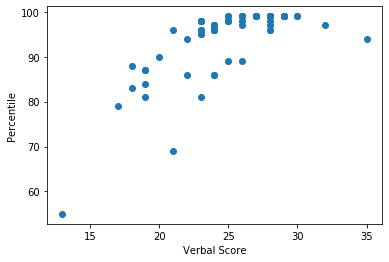

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.33, random_state = 0)


plt.scatter(xtrain, ytrain)
plt.xlabel("Verbal Score")
plt.ylabel("Percentile")

In [ ]:
xtrain = xtrain.values.reshape(-1, 1)
ytrain = ytrain.values.reshape(-1, 1)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X=xtrain, y=ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
def print_model_fit(model):
    print('Intercept: {i}  Coefficients: {c}'.format(i=model.intercept_, c=model.coef_))
    


In [ ]:
def plot_best_fit_line(model, x, y):
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('Data and Best-Fit Line')
    matplotlib.pyplot.xlabel('Raw Score')
    matplotlib.pyplot.ylabel('Percentile')

    matplotlib.pyplot.scatter(x, y)
    
    X = np.linspace(10, 35) 
    Y = model.predict(list(zip(X)))
    matplotlib.pyplot.plot(X, Y)

Intercept: [57.97935028]  Coefficients: [[1.45941791]]


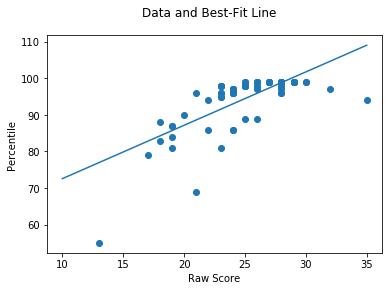

In [ ]:
print_model_fit(model)
plot_best_fit_line(model, xtrain, ytrain)

In [ ]:
xtest = xtest.values.reshape(-1,1)
ytest = ytest.values.reshape(-1,1)

In [ ]:
predict = model.predict(xtest)
predict

array([[ 93.0053802 ],
       [ 82.78945481],
       [101.76188768],
       [ 93.0053802 ],
       [ 95.92421603],
       [ 88.62712646],
       [ 93.0053802 ],
       [ 98.84305185],
       [ 91.54596229],
       [ 97.38363394],
       [100.30246977],
       [101.76188768],
       [ 87.16770855],
       [100.30246977],
       [ 95.92421603],
       [ 94.46479811],
       [ 90.08654437],
       [100.30246977],
       [ 95.92421603],
       [100.30246977],
       [100.30246977],
       [ 94.46479811],
       [ 98.84305185],
       [100.30246977],
       [ 98.84305185],
       [ 91.54596229],
       [ 97.38363394],
       [ 93.0053802 ],
       [ 93.0053802 ],
       [ 91.54596229],
       [ 95.92421603],
       [ 93.0053802 ],
       [ 94.46479811],
       [ 95.92421603],
       [ 94.46479811],
       [ 95.92421603],
       [ 95.92421603],
       [100.30246977]])

An observation I had was that the model outputted values over 100 in some cases for the percentile. This reflects the fact that models do not represent reality, which has the larger implication of showing how careful you need to be when choosing a model.

In [ ]:
print("Mean squared error: %.2f"
      % mean_squared_error(ytest, predict))
print("R^2 Value: %.2f" % r2_score(ytest, predict))

Mean squared error: 15.62
R^2 Value: 0.41


In [ ]:
#Seeing how well the line fits the testing data

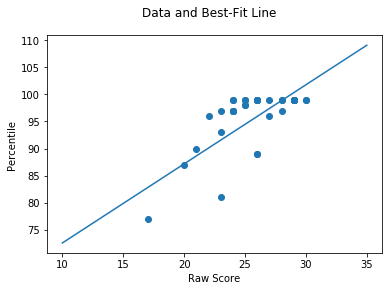

In [ ]:
plot_best_fit_line(model,xtest,ytest)

In [ ]:
predicted = pd.DataFrame(data = xtest, columns = ["raw score"])
predicted['actual percentile'] = ytest
predicted['predicted percentile'] = predict
predicted['difference'] = abs(predicted['predicted percentile'] - predicted['actual percentile'])
predicted

,raw score,actual percentile,predicted percentile,difference
0,24,97,93.005380,3.994620
1,17,77,82.789455,5.789455
2,30,99,101.761888,2.761888
3,24,99,93.005380,5.994620
4,26,89,95.924216,6.924216
5,21,90,88.627126,1.372874
6,24,97,93.005380,3.994620
7,28,97,98.843052,1.843052
8,23,93,91.545962,1.454038
9,27,96,97.383634,1.383634


In [ ]:
predicted['difference'].mean()

3.258721588763875

## Conclusions
As expected, there is a linear relationship between raw score and percentile. However, the relationship was not as strong as I expected, possibly due to variations from district to district in the way the percentiles were distributed.

## 2. SVM

I thought it would be interesting to explore how scores might vary depending on the grade students were going into and their birth month. To get some insight into this, I chose to use Support Vector Machines - I was excited to try out SVM's since I hadn't previously gotten a chance to use them. First, I decided to use an SVM to see if it could separate scores based on grade level.

In [ ]:
cluster = final_data.copy()

cluster = cluster.drop([72,98])
cluster

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score
0,2017-04,1,28,9,28,99,45,99,99
1,2017-04,0,28,8,25,99,39,99,99
2,2017-04,1,3,3,27,96,42,99,98
3,2017-04,0,15,9,23,97,40,99,98
4,2017-04,0,31,4,25,98,38,99,99
5,2017-04,0,2,5,24,97,36,98,98
6,2017-04,0,28,2,26,99,42,99,99
7,2017-04,0,3,10,24,99,42,99,99
8,2017-04,1,26,3,23,81,42,99,95
9,2017-04,2,15,4,29,99,44,99,99


In [ ]:
scores = pd.DataFrame()
scores['verbal'] = x
scores['nonverbal'] = y
scores['grade'] = cluster['Entering Grade Level']

In [ ]:
scores

,verbal,nonverbal,grade
0,28,45,1
1,25,39,0
2,27,42,1
3,23,40,0
4,25,38,0
5,24,36,0
6,26,42,0
7,24,42,0
8,23,42,1
9,29,44,2


I decided to drop rows with grade = 2 in order to keep the data in two classes to make it simpler to separate.

In [ ]:
scores = scores[scores.grade != 2]

In [ ]:
scores

,verbal,nonverbal,grade
0,28,45,1
1,25,39,0
2,27,42,1
3,23,40,0
4,25,38,0
5,24,36,0
6,26,42,0
7,24,42,0
8,23,42,1
10,17,39,0


In [ ]:
verbal = scores['verbal']
nonverbal = scores['nonverbal']

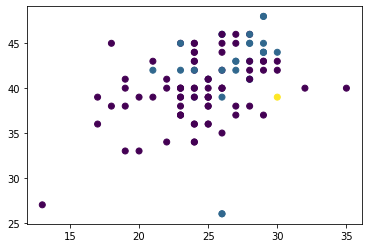

In [ ]:
plt.scatter(verbal, nonverbal, c = scores['grade'])

In [ ]:
fullscores = scores[['verbal', 'nonverbal']].values.tolist()
fullscores = np.array(fullscores)


The below code is adapted from https://scikit-learn.org/0.20/auto_examples/svm/plot_iris.html

Automatically created module for IPython interactive environment


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


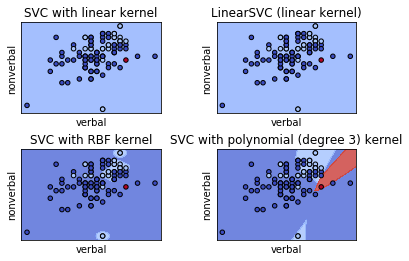

In [ ]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
# Take the first two features. We could avoid this by using a two-dim dataset
X = fullscores
y = scores.grade

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('verbal')
    ax.set_ylabel('nonverbal')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Conclusions
I would expect the scores of the students going into kindergarten to be vastly different from first graders - the SVM with a kernel function, as expected, scaled the data out and it seems like the SVM's with kernels were able to create somewhat distinct groups. Plotting this in 3D could show a sharper divide.

# SVM with Birth Month

I also wanted to use an SVM to see if there were any significant differences among birth month. I was wondering if certain birth months could have ended up performing better due to cutoff dates or being a year older than their classmates.

In [ ]:
months = scores.copy()
months['grade'] = cluster['Birth Month']
months
months.rename(columns = {'grade':'month'}, inplace = True) 
months

,verbal,nonverbal,month
0,28,45,9
1,25,39,8
2,27,42,3
3,23,40,9
4,25,38,4
5,24,36,5
6,26,42,2
7,24,42,10
8,23,42,3
10,17,39,6


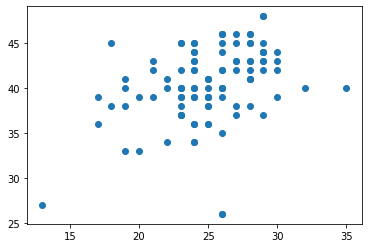

In [ ]:
plt.scatter(verbal, nonverbal)


Automatically created module for IPython interactive environment


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


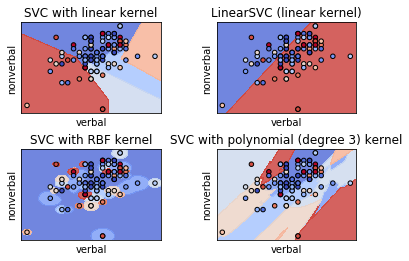

In [ ]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
# Take the first two features. We could avoid this by using a two-dim dataset
X = fullscores
y = months.month

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('verbal')
    ax.set_ylabel('nonverbal')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Conclusions

None of the SVM's showed distinct groups when it came to birth month.

# Overall Conclusions

Running models on this data helped me understand the reality of the challenges often presented in machine learning.  I was not able to uncover any significant trends from this dataset. Despite our emphasis on machine learning and the advanced techniques available to us, sometimes analyzing the ground truth of data can reveal the most important insights. 